In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Data Gathering

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/rumahyogya.csv')

In [4]:
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


In [5]:
df.tail()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
2015,Rp 500 Juta,https://www.rumah123.com/properti/sleman/hos17...,"Rumah Baru, 500 Juta, Bisa Kpr Di Kalasan, Sleman","Kalasan, Sleman",3.0,2.0,2.0,104 m²,80 m²
2016,Rp 750 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH MINIMALIS AREA JL KABUPATEN SLEMAN,"Gamping, Sleman",2.0,1.0,1.0,89 m²,60 m²
2017,Rp 756 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH SKANDINAVIAN DI JL GITOGATI NGAGLIK (5 M...,"Ngaglik, Sleman",2.0,1.0,2.0,140 m²,60 m²
2018,"Rp 1,78 Miliar",https://www.rumah123.com/properti/sleman/hos16...,Rumah Mewah Dekat Kampus Ugm di Maguwoharjo Da...,"Depok, Sleman",4.0,3.0,2.0,118 m²,160 m²
2019,"Rp 2,3 Miliar",https://www.rumah123.com/properti/yogyakarta/h...,"Jual Rumah Siap Huni di Perumahan Dayu Permai,...","Sleman, Yogyakarta",4.0,3.0,1.0,200 m²,180 m²


# Data Cleaning dan Transformation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   object 
 8   building_area     2019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 142.2+ KB


In [7]:
df.describe()

,bed,bath,carport
count,2001.000000,1999.000000,1713.000000
mean,3.969015,2.941971,1.559253
std,3.671654,3.517671,1.283030
min,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,3.000000,2.000000,1.000000
75%,4.000000,3.000000,2.000000
max,49.000000,49.000000,15.000000


### Melihat jumlah baris yang duplikat


---
Tidak ada baris yang duplikat






In [8]:
duplicate_rows = df[df.duplicated()]
print("Jumlah baris duplikat:", duplicate_rows.shape[0])

Jumlah baris duplikat: 0


### Melihat kolom yang terdapat missing value

---
terdapat 5 kolom yang memiliki missing value


In [9]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
bed,19
bath,21
carport,307
surface_area,1
building_area,1


### Menghapus kolom "nav-link" dan "description" karena tidak dibutuhkan

In [10]:
kolom_yang_dihapus = ['nav-link', 'description']

print("Dataframe sebelum kolom dihilangkan")
print(df.info())


df_baru = df.drop(labels=kolom_yang_dihapus, axis=1)

print("\nDataframe sesudah kolom dihilangkan")
print(df_baru.info())

Dataframe sebelum kolom dihilangkan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   object 
 8   building_area     2019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 142.2+ KB
None

Dataframe sesudah kolom dihilangkan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object

### Mengubah format isi kolom dan menubah tipe data kolom "price", "surface_area", dan "buliding_area" ke float

In [11]:
# Fungsi untuk mengonversi harga ke numeric
def convert_price(price):
    if isinstance(price, (int, float)):  # Jika sudah numerik, kembalikan langsung
        return price
    if isinstance(price, str):
        price = price.lower().replace("rp", "").replace(" ", "").replace(".", "").replace(",", ".")
        if "miliar" in price:
            return float(price.replace("miliar", "")) * 1_000_000_000
        elif "juta" in price:
            return float(price.replace("juta", "")) * 1_000_000
    return None  # Jika tidak bisa dikonversi

# Fungsi untuk mengonversi ukuran tanah/bangunan ke numeric
def convert_area(area):
    if isinstance(area, (int, float)):  # Jika sudah numerik, kembalikan langsung
        return area
    if isinstance(area, str):
        return float(area.lower().replace("m²", "").strip()) if "m²" in area else None
    return None  # Jika tidak bisa dikonversi

# Terapkan fungsi ke beberapa kolom dan ubah ke float
df_baru["price"] = df_baru["price"].apply(convert_price).astype(float)
df_baru["surface_area"] = df_baru["surface_area"].apply(convert_area).astype(float)
df_baru["building_area"] = df_baru["building_area"].apply(convert_area).astype(float)

# Cek hasil transformasi
print(df_baru.dtypes)  # Pastikan semua sudah float
print(df_baru)  # Lihat hasil konversi

price               float64
listing-location     object
bed                 float64
bath                float64
carport             float64
surface_area        float64
building_area       float64
dtype: object
             price    listing-location  bed  bath  carport  surface_area  \
0     1.790000e+09     Ngaglik, Sleman  3.0   3.0      2.0         120.0   
1     1.700000e+08      Jombor, Sleman  3.0   2.0      1.0         102.0   
2     6.950000e+08      Berbah, Sleman  2.0   2.0      1.0         100.0   
3     5.600000e+08   Prambanan, Sleman  3.0   1.0      1.0         109.0   
4     2.000000e+08     Moyudan, Sleman  2.0   1.0      1.0          60.0   
...            ...                 ...  ...   ...      ...           ...   
2015  5.000000e+08     Kalasan, Sleman  3.0   2.0      2.0         104.0   
2016  7.500000e+08     Gamping, Sleman  2.0   1.0      1.0          89.0   
2017  7.560000e+08     Ngaglik, Sleman  2.0   1.0      2.0         140.0   
2018  1.780000e+09       Depok

In [12]:
less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

### Mengisi missing value pada kolom dengan nilai median

In [13]:
# Pilih kolom yang ingin diisi dengan median
columns_to_fill = ["bed", "bath", "carport", "surface_area", "building_area"]

# Isi nilai NaN dengan median masing-masing kolom
df_baru[columns_to_fill] = df_baru[columns_to_fill].fillna(df_baru[columns_to_fill].median())

# Cek hasilnya
print(df_baru)

             price    listing-location  bed  bath  carport  surface_area  \
0     1.790000e+09     Ngaglik, Sleman  3.0   3.0      2.0         120.0   
1     1.700000e+08      Jombor, Sleman  3.0   2.0      1.0         102.0   
2     6.950000e+08      Berbah, Sleman  2.0   2.0      1.0         100.0   
3     5.600000e+08   Prambanan, Sleman  3.0   1.0      1.0         109.0   
4     2.000000e+08     Moyudan, Sleman  2.0   1.0      1.0          60.0   
...            ...                 ...  ...   ...      ...           ...   
2015  5.000000e+08     Kalasan, Sleman  3.0   2.0      2.0         104.0   
2016  7.500000e+08     Gamping, Sleman  2.0   1.0      1.0          89.0   
2017  7.560000e+08     Ngaglik, Sleman  2.0   1.0      2.0         140.0   
2018  1.780000e+09       Depok, Sleman  4.0   3.0      2.0         118.0   
2019  2.300000e+09  Sleman, Yogyakarta  4.0   3.0      1.0         200.0   

      building_area  
0             110.0  
1             126.0  
2             100.0  

In [14]:
missing_values = df_baru.isnull().sum()
missing_values[missing_values > 0]

,0


In [15]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   float64
 1   listing-location  2020 non-null   object 
 2   bed               2020 non-null   float64
 3   bath              2020 non-null   float64
 4   carport           2020 non-null   float64
 5   surface_area      2020 non-null   float64
 6   building_area     2020 non-null   float64
dtypes: float64(6), object(1)
memory usage: 110.6+ KB


<Figure size 1200x600 with 0 Axes>

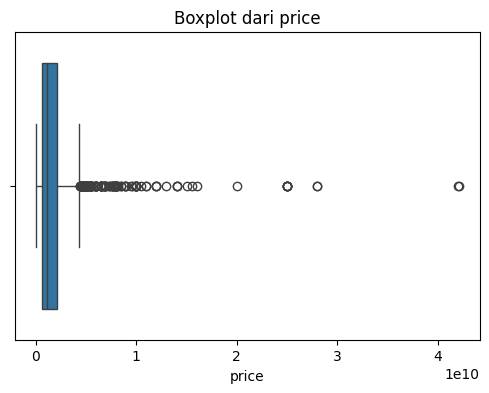

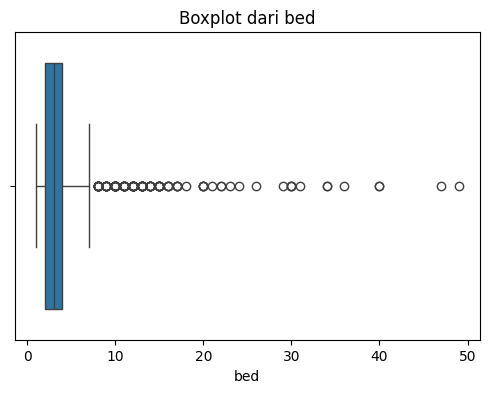

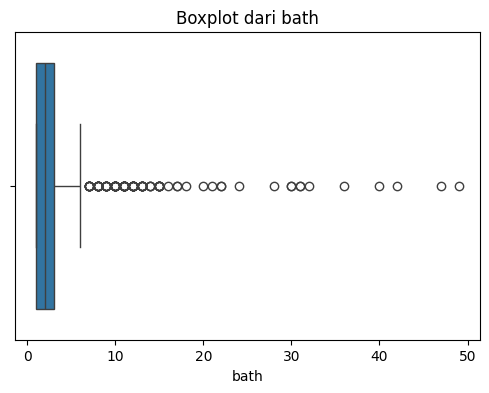

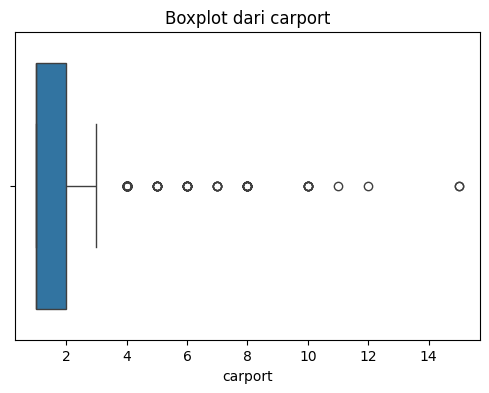

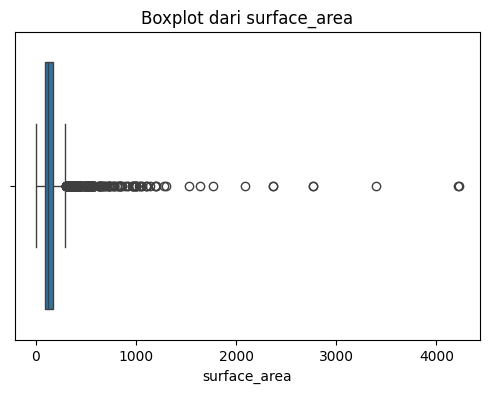

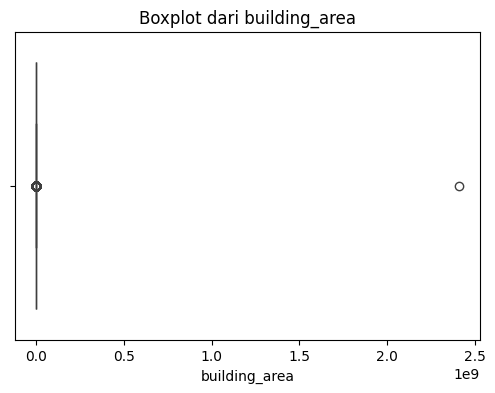

In [16]:
# Pilih semua fitur numerik
numeric_features = df_baru.select_dtypes(include=['number']).columns

# Plot Boxplot untuk melihat outlier
plt.figure(figsize=(12, 6))
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_baru[col])
    plt.title(f'Boxplot dari {col}')
    plt.show()


<Figure size 1200x600 with 0 Axes>

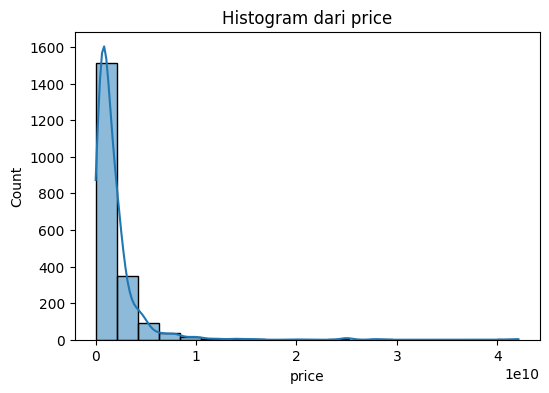

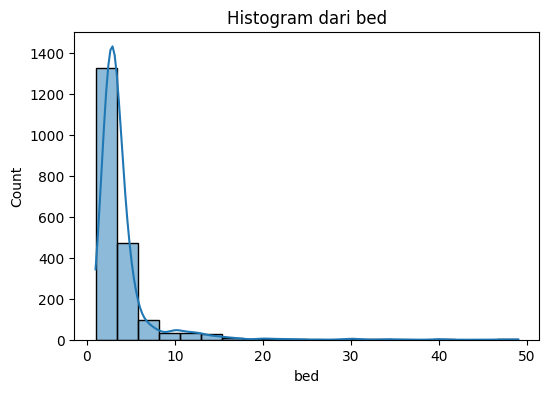

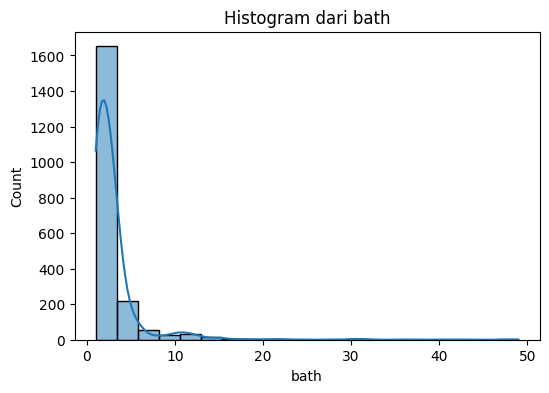

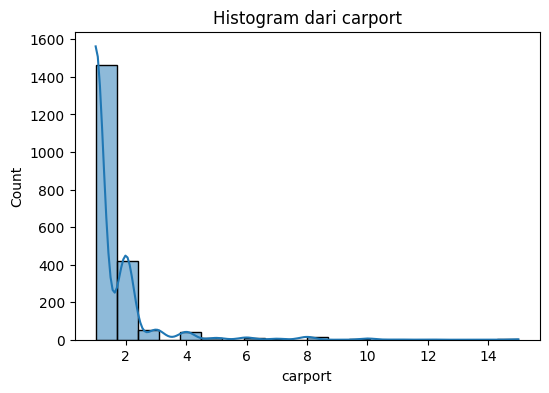

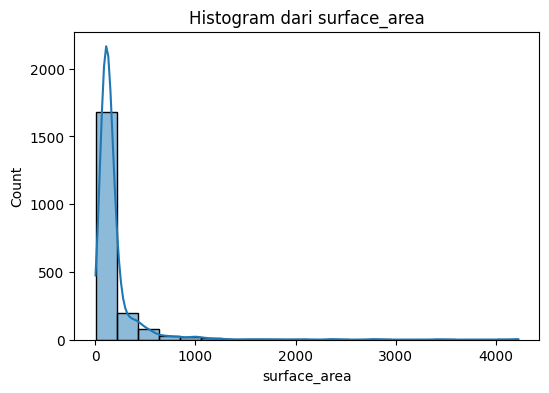

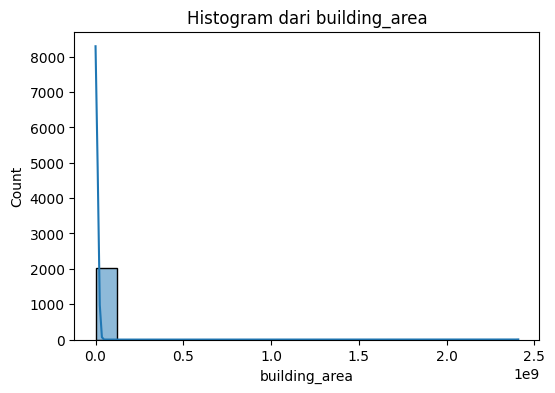

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Histogram untuk semua kolom numerik
plt.figure(figsize=(12, 6))
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_baru[col], kde=True, bins=20)
    plt.title(f'Histogram dari {col}')
    plt.show()


In [18]:
print(df_baru['building_area'].describe())


count    2.020000e+03
mean     1.192302e+06
std      5.358063e+07
min      4.000000e+00
25%      6.000000e+01
50%      1.000000e+02
75%      1.650000e+02
max      2.408150e+09
Name: building_area, dtype: float64


In [19]:
df_baru.head()

,price,listing-location,bed,bath,carport,surface_area,building_area
0,1.790000e+09,"Ngaglik, Sleman",3.0,3.0,2.0,120.0,110.0
1,1.700000e+08,"Jombor, Sleman",3.0,2.0,1.0,102.0,126.0
2,6.950000e+08,"Berbah, Sleman",2.0,2.0,1.0,100.0,100.0
3,5.600000e+08,"Prambanan, Sleman",3.0,1.0,1.0,109.0,67.0
4,2.000000e+08,"Moyudan, Sleman",2.0,1.0,1.0,60.0,30.0


In [20]:
print(df_baru.nlargest(10, 'building_area'))


             price        listing-location   bed  bath  carport  surface_area  \
1090  2.400000e+09          Sleman, Sleman   4.0   3.0      1.0         182.0   
1276  8.750000e+08         Ngaglik, Sleman   3.0   2.0      1.0         107.0   
560   2.000000e+10  Umbulharjo, Yogyakarta  47.0  47.0     15.0        2085.0   
83    2.800000e+10    Demangan, Yogyakarta   6.0   3.0      3.0         998.0   
712   2.800000e+10    Demangan, Yogyakarta   6.0   3.0      3.0         998.0   
39    2.500000e+10           Depok, Sleman  34.0  32.0     10.0         832.0   
742   1.200000e+10         Ngaglik, Sleman  36.0  36.0     12.0         644.0   
1056  1.200000e+09          Sedayu, Bantul   3.0   3.0      2.0         101.0   
48    1.000000e+10         Ngaglik, Sleman   9.0   5.0      8.0        1527.0   
126   2.500000e+10  Pakualaman, Yogyakarta   9.0   9.0      3.0         429.0   

      building_area  
1090   2.408150e+09  
1276   5.070000e+03  
560    2.295000e+03  
83     1.600000e+03 

In [21]:
# Ambil hanya kolom numeric
numeric_cols = df_baru.select_dtypes(include=[np.number]).columns

# Loop melalui setiap kolom numeric untuk menangani outlier
for col in numeric_cols:
    Q1 = df_baru[col].quantile(0.25)
    Q3 = df_baru[col].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti outlier dengan batas terdekat
    df_baru[col] = np.where(df_baru[col] < lower_bound, lower_bound, df_baru[col])
    df_baru[col] = np.where(df_baru[col] > upper_bound, upper_bound, df_baru[col])

# Cek kembali statistik dataset setelah menangani outlier
print(df_baru.describe())

              price          bed         bath      carport  surface_area  \
count  2.020000e+03  2020.000000  2020.000000  2020.000000   2020.000000   
mean   1.540861e+09     3.448515     2.487624     1.365842    145.777228   
std    1.206264e+09     1.463041     1.427580     0.667153     71.395389   
min    7.000000e+06     1.000000     1.000000     1.000000      4.000000   
25%    6.450000e+08     2.000000     1.000000     1.000000     97.000000   
50%    1.100000e+09     3.000000     2.000000     1.000000    120.000000   
75%    2.132500e+09     4.000000     3.000000     2.000000    178.000000   
max    4.363750e+09     7.000000     6.000000     3.500000    299.500000   

       building_area  
count    2020.000000  
mean      127.248267  
std        84.864319  
min         4.000000  
25%        60.000000  
50%       100.000000  
75%       165.000000  
max       322.500000  


<Figure size 1200x600 with 0 Axes>

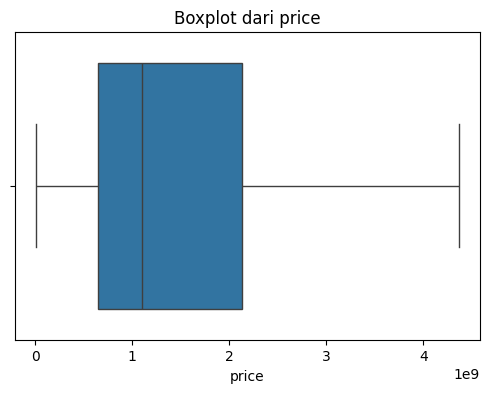

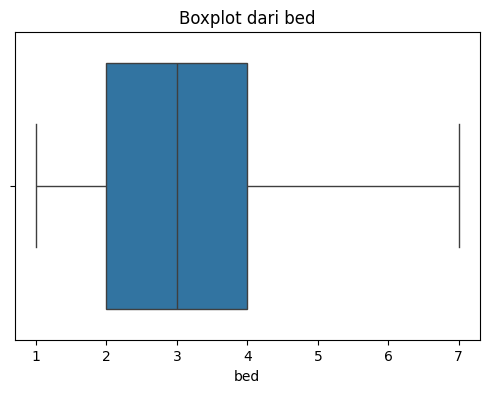

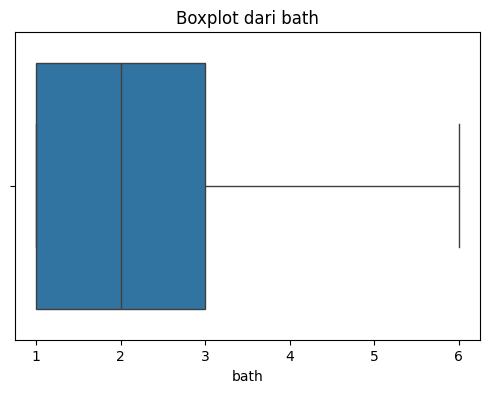

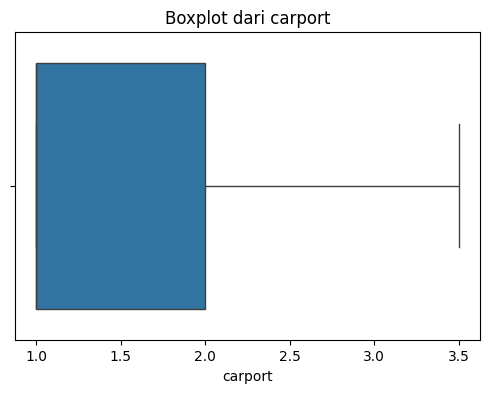

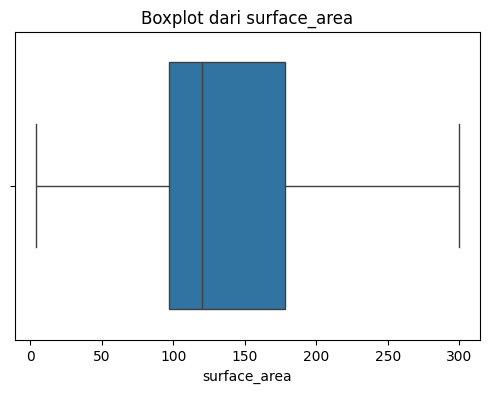

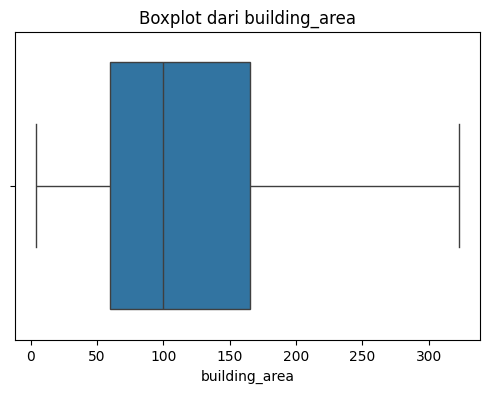

In [22]:
# Pilih semua fitur numerik
numeric_features = df_baru.select_dtypes(include=['number']).columns

# Plot Boxplot untuk melihat outlier
plt.figure(figsize=(12, 6))
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_baru[col])
    plt.title(f'Boxplot dari {col}')
    plt.show()


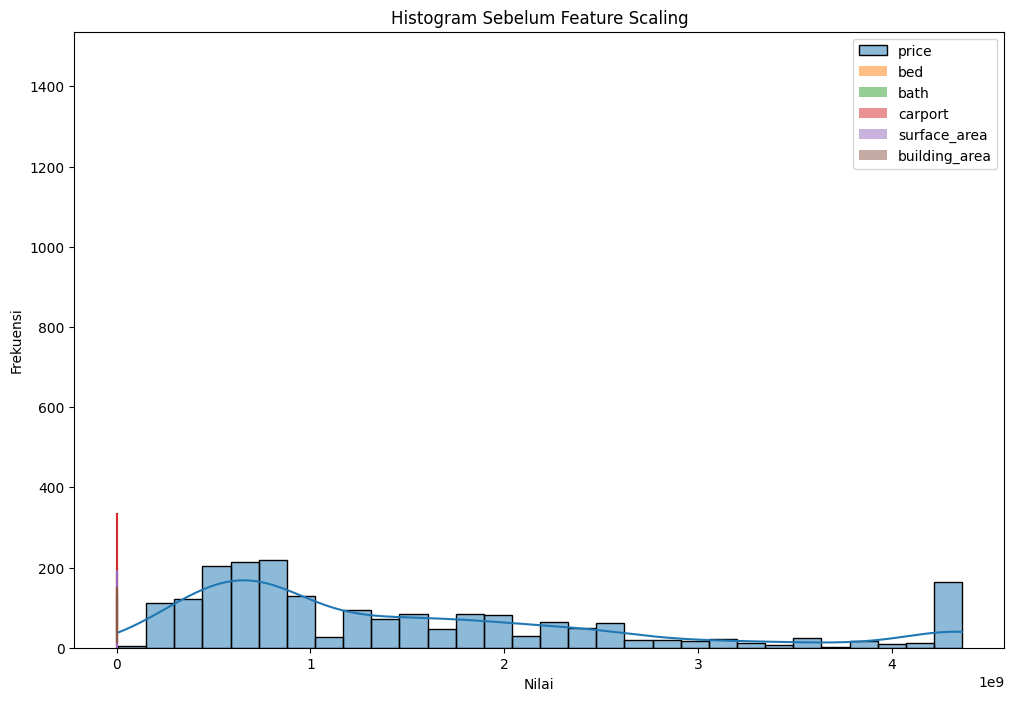

In [23]:
# Pilih hanya kolom numerik
numeric_cols = df_baru.select_dtypes(include=['number']).columns

# Plot histogram untuk semua fitur numerik
plt.figure(figsize=(12, 8))
for col in numeric_cols:
    sns.histplot(df_baru[col], kde=True, label=col, bins=30, alpha=0.5)

plt.xlabel("Nilai")
plt.ylabel("Frekuensi")
plt.title("Histogram Sebelum Feature Scaling")
plt.legend()
plt.show()


In [24]:
# Pilih hanya fitur numerik (kecuali target 'price')
numeric_features = df_baru.select_dtypes(include=['int64', 'float64']).columns
numeric_features = numeric_features.drop('price')  # Jika 'price' adalah target

# Buat objek StandardScaler
scaler = StandardScaler()

# Lakukan standarisasi pada fitur numerik
df_baru[numeric_features] = scaler.fit_transform(df_baru[numeric_features])

# Cek hasil transformasi
print(df_baru.head())

          price   listing-location       bed      bath   carport  \
0  1.790000e+09    Ngaglik, Sleman -0.306639  0.359001  0.950780   
1  1.700000e+08     Jombor, Sleman -0.306639 -0.341658 -0.548498   
2  6.950000e+08     Berbah, Sleman -0.990317 -0.341658 -0.548498   
3  5.600000e+08  Prambanan, Sleman -0.306639 -1.042318 -0.548498   
4  2.000000e+08    Moyudan, Sleman -0.990317 -1.042318 -0.548498   

   surface_area  building_area  
0     -0.361138      -0.203296  
1     -0.613318      -0.014713  
2     -0.641338      -0.321160  
3     -0.515248      -0.710112  
4     -1.201737      -1.146210  


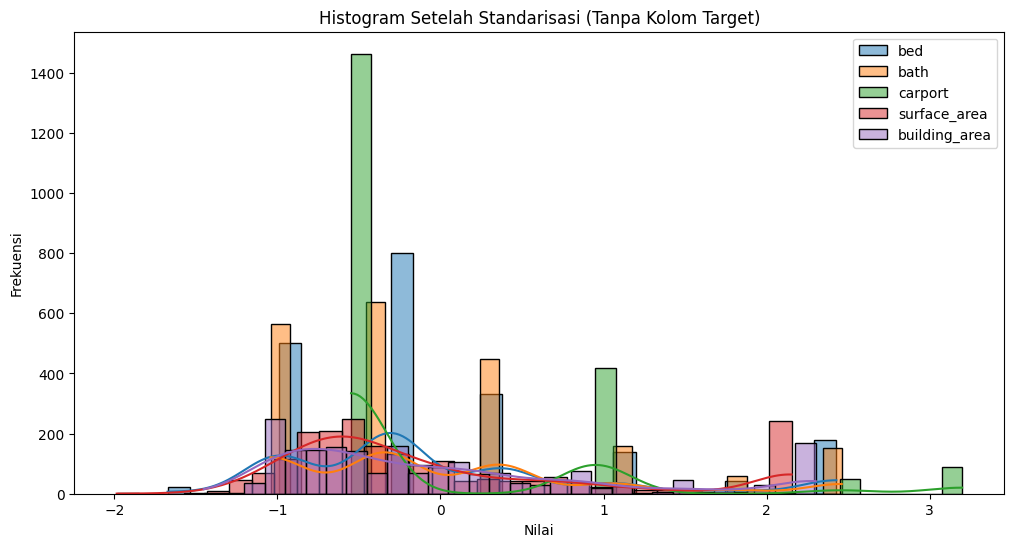

In [25]:
# Pilih hanya kolom numerik selain target ('price')
numeric_columns = df_baru.select_dtypes(include=['number']).columns
features = df_baru[numeric_columns].drop(columns=['price'], errors='ignore')

# Buat objek scaler dan transformasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Simpan ke DataFrame baru dengan nama kolom yang sama
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Plot histogram setelah standarisasi
plt.figure(figsize=(12, 6))

for column in df_scaled.columns:
    sns.histplot(df_scaled[column], kde=True, label=column, bins=30)

plt.title("Histogram Setelah Standarisasi (Tanpa Kolom Target)")
plt.xlabel("Nilai")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()



In [26]:
df_baru[numeric_columns].skew()


,0
price,1.120835
bed,1.165012
bath,1.049980
carport,1.851289
surface_area,1.120632
building_area,1.058574


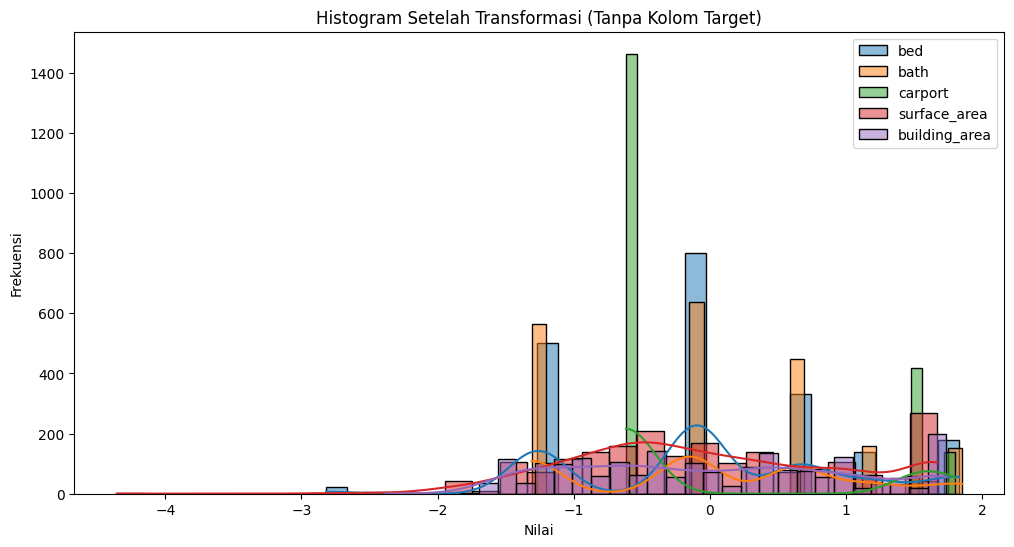

In [27]:


# Pilih hanya kolom numerik selain target ('price')
numerical_features = df_baru.select_dtypes(include=['number']).drop(columns=['price'])

# Terapkan PowerTransformer (Yeo-Johnson) hanya ke fitur numerik
scaler = PowerTransformer(method='yeo-johnson')
features_transformed = scaler.fit_transform(numerical_features)

# Simpan hasil transformasi ke DataFrame baru
df_transformed = pd.DataFrame(features_transformed, columns=numerical_features.columns)

# --- Plot Histogram Setelah Transformasi ---
plt.figure(figsize=(12, 6))
for column in df_transformed.columns:
    sns.histplot(df_transformed[column], kde=True, label=column, bins=30)

plt.title("Histogram Setelah Transformasi (Tanpa Kolom Target)")
plt.xlabel("Nilai")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

In [28]:
df_baru[numeric_columns].skew()

,0
price,1.120835
bed,1.165012
bath,1.049980
carport,1.851289
surface_area,1.120632
building_area,1.058574


bed              0.020971
bath             0.125502
carport          1.013784
surface_area     0.119409
building_area    0.174544
dtype: float64


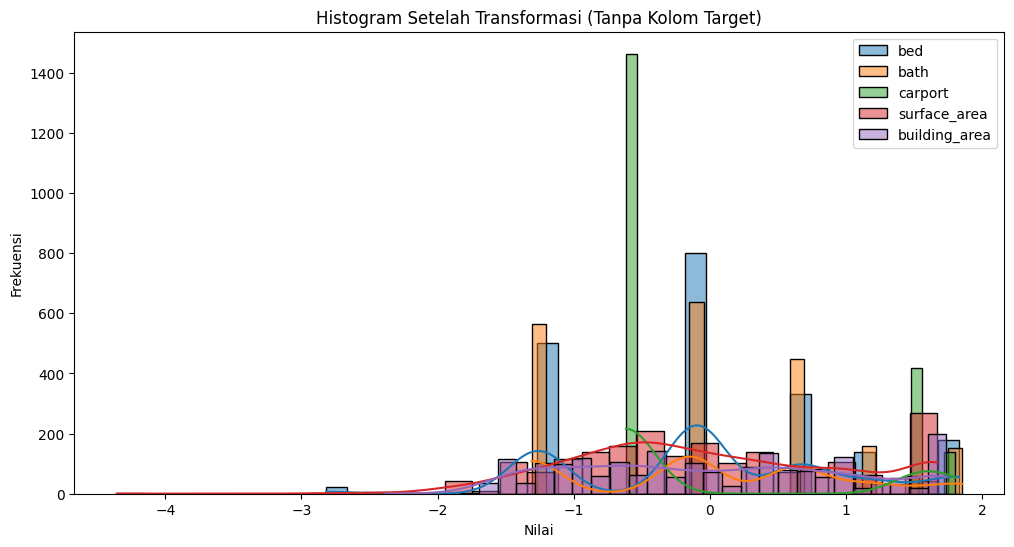

In [29]:
# Pilih hanya fitur numerik selain target
numeric_columns = df_baru.select_dtypes(include=['number']).columns
features = df_baru[numeric_columns].drop(columns=['price'])

# Terapkan PowerTransformer (Yeo-Johnson)
scaler = PowerTransformer(method='yeo-johnson')
features_transformed = scaler.fit_transform(features)

# Simpan ke DataFrame baru
df_transformed = pd.DataFrame(features_transformed, columns=features.columns)

# Cek skewness setelah transformasi
print(df_transformed.skew())

# Plot histogram setelah transformasi
plt.figure(figsize=(12, 6))
for column in df_transformed.columns:
    sns.histplot(df_transformed[column], kde=True, label=column, bins=30)
plt.title("Histogram Setelah Transformasi (Tanpa Kolom Target)")
plt.xlabel("Nilai")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

In [30]:
df_baru.head()

,price,listing-location,bed,bath,carport,surface_area,building_area
0,1.790000e+09,"Ngaglik, Sleman",-0.306639,0.359001,0.950780,-0.361138,-0.203296
1,1.700000e+08,"Jombor, Sleman",-0.306639,-0.341658,-0.548498,-0.613318,-0.014713
2,6.950000e+08,"Berbah, Sleman",-0.990317,-0.341658,-0.548498,-0.641338,-0.321160
3,5.600000e+08,"Prambanan, Sleman",-0.306639,-1.042318,-0.548498,-0.515248,-0.710112
4,2.000000e+08,"Moyudan, Sleman",-0.990317,-1.042318,-0.548498,-1.201737,-1.146210


In [31]:
# Mengelompokkan data berdasarkan listing-location dan menghitung jumlah kemunculan
jumlah_per_lokasi = df_baru.groupby('listing-location').size().reset_index(name='jumlah')

# Menampilkan hasil
print("Jumlah Per Lokasi:")
print(jumlah_per_lokasi)

# Menampilkan semua nilai unik dalam kolom listing-location
lokasi_unik = df_baru['listing-location'].unique()
print("\nLokasi unik dalam kolom listing-location:")
for lokasi in lokasi_unik:
    print(lokasi)

Jumlah Per Lokasi:
          listing-location  jumlah
0    Bambanglipuro, Bantul       1
1      Banguntapan, Bantul     117
2           Bantul, Bantul      33
3       Bantul, Yogyakarta       8
4           Berbah, Sleman      26
..                     ...     ...
64            Turi, Sleman       6
65  Umbulharjo, Yogyakarta      46
66      Wates, Kulon Progo       6
67  Wirobrajan, Yogyakarta      27
68  Wonosari, Gunung Kidul       6

[69 rows x 2 columns]

Lokasi unik dalam kolom listing-location:
Ngaglik, Sleman
Jombor, Sleman
Berbah, Sleman
Prambanan, Sleman
Moyudan, Sleman
Depok, Sleman
Gamping, Sleman
Kaliurang, Yogyakarta
Sedayu, Bantul
Ngemplak, Sleman
Piyungan, Bantul
Umbulharjo, Yogyakarta
Godean, Sleman
Mlati, Sleman
Condong Catur, Sleman
Kasihan, Bantul
Bantul, Bantul
Sleman, Sleman
Sewon, Bantul
Kalasan, Sleman
Plered, Bantul
Sleman, Yogyakarta
Maguwoharjo, Yogyakarta
Demangan, Yogyakarta
Purwomartani   , Sleman
Minggir, Sleman
Gondokusuman, Yogyakarta
Kotagede, Yogyakarta

In [32]:
# Buat daftar lokasi berdasarkan harga median
median_prices = df_baru.groupby('listing-location')['price'].median().sort_values().index
location_mapping = {loc: i for i, loc in enumerate(median_prices)}

# Ubah lokasi menjadi angka berdasarkan harga median
df_baru['listing-location'] = df_baru['listing-location'].map(location_mapping)


In [33]:
df_label = pd.get_dummies(df_baru, columns=['listing-location'])
df_label

,price,bed,bath,carport,surface_area,building_area,listing-location_0,listing-location_1,listing-location_2,listing-location_3,...,listing-location_59,listing-location_60,listing-location_61,listing-location_62,listing-location_63,listing-location_64,listing-location_65,listing-location_66,listing-location_67,listing-location_68
0,1.790000e+09,-0.306639,0.359001,0.950780,-0.361138,-0.203296,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.700000e+08,-0.306639,-0.341658,-0.548498,-0.613318,-0.014713,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6.950000e+08,-0.990317,-0.341658,-0.548498,-0.641338,-0.321160,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5.600000e+08,-0.306639,-1.042318,-0.548498,-0.515248,-0.710112,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.000000e+08,-0.990317,-1.042318,-0.548498,-1.201737,-1.146210,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,5.000000e+08,-0.306639,-0.341658,0.950780,-0.585298,-0.556889,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016,7.500000e+08,-0.990317,-1.042318,-0.548498,-0.795448,-0.792617,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2017,7.560000e+08,-0.990317,-1.042318,0.950780,-0.080939,-0.792617,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018,1.780000e+09,0.377038,0.359001,0.950780,-0.389158,0.386026,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
df_baru.head()

,price,listing-location,bed,bath,carport,surface_area,building_area
0,1.790000e+09,45,-0.306639,0.359001,0.950780,-0.361138,-0.203296
1,1.700000e+08,28,-0.306639,-0.341658,-0.548498,-0.613318,-0.014713
2,6.950000e+08,20,-0.990317,-0.341658,-0.548498,-0.641338,-0.321160
3,5.600000e+08,8,-0.306639,-1.042318,-0.548498,-0.515248,-0.710112
4,2.000000e+08,1,-0.990317,-1.042318,-0.548498,-1.201737,-1.146210


# Exploratory Data analysis

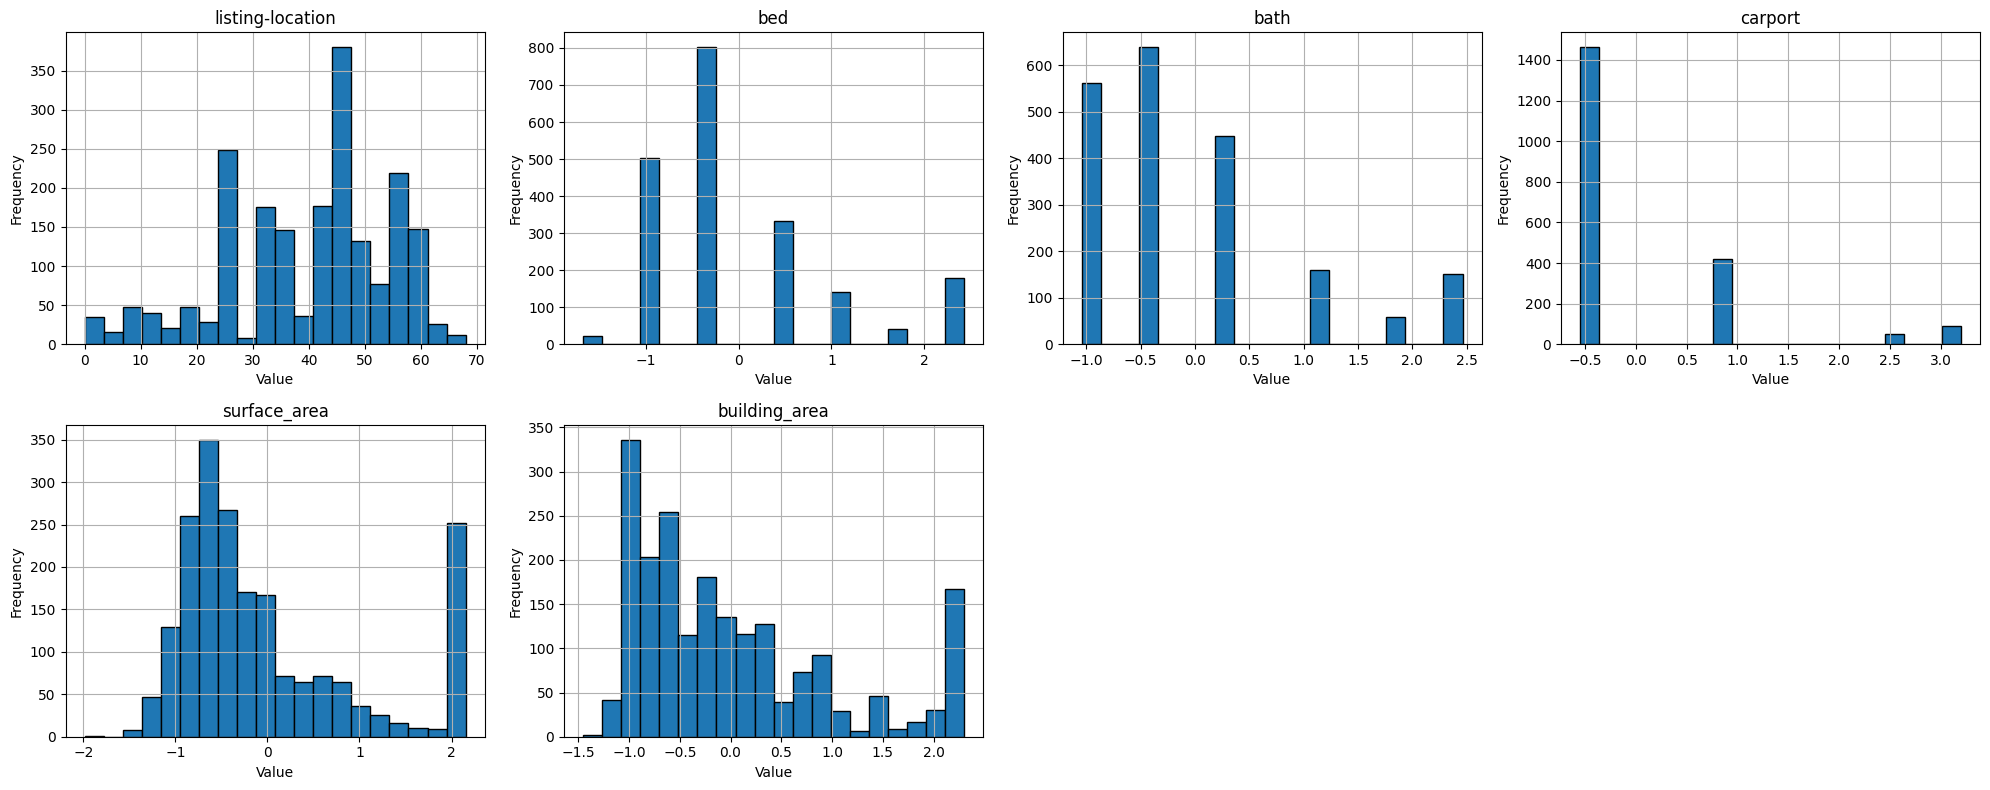

In [35]:
# Pilih hanya kolom numerik selain target ('price')
numeric_columns = df_baru.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop('price', errors='ignore')  # Hapus 'price' jika ada

# Menghitung jumlah variabel numerik
num_vars = len(numeric_columns)

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk iterasi lebih mudah
axes = axes.flatten()

# Plot histogram setiap fitur numerik
for i, column in enumerate(numeric_columns):
    df_baru[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

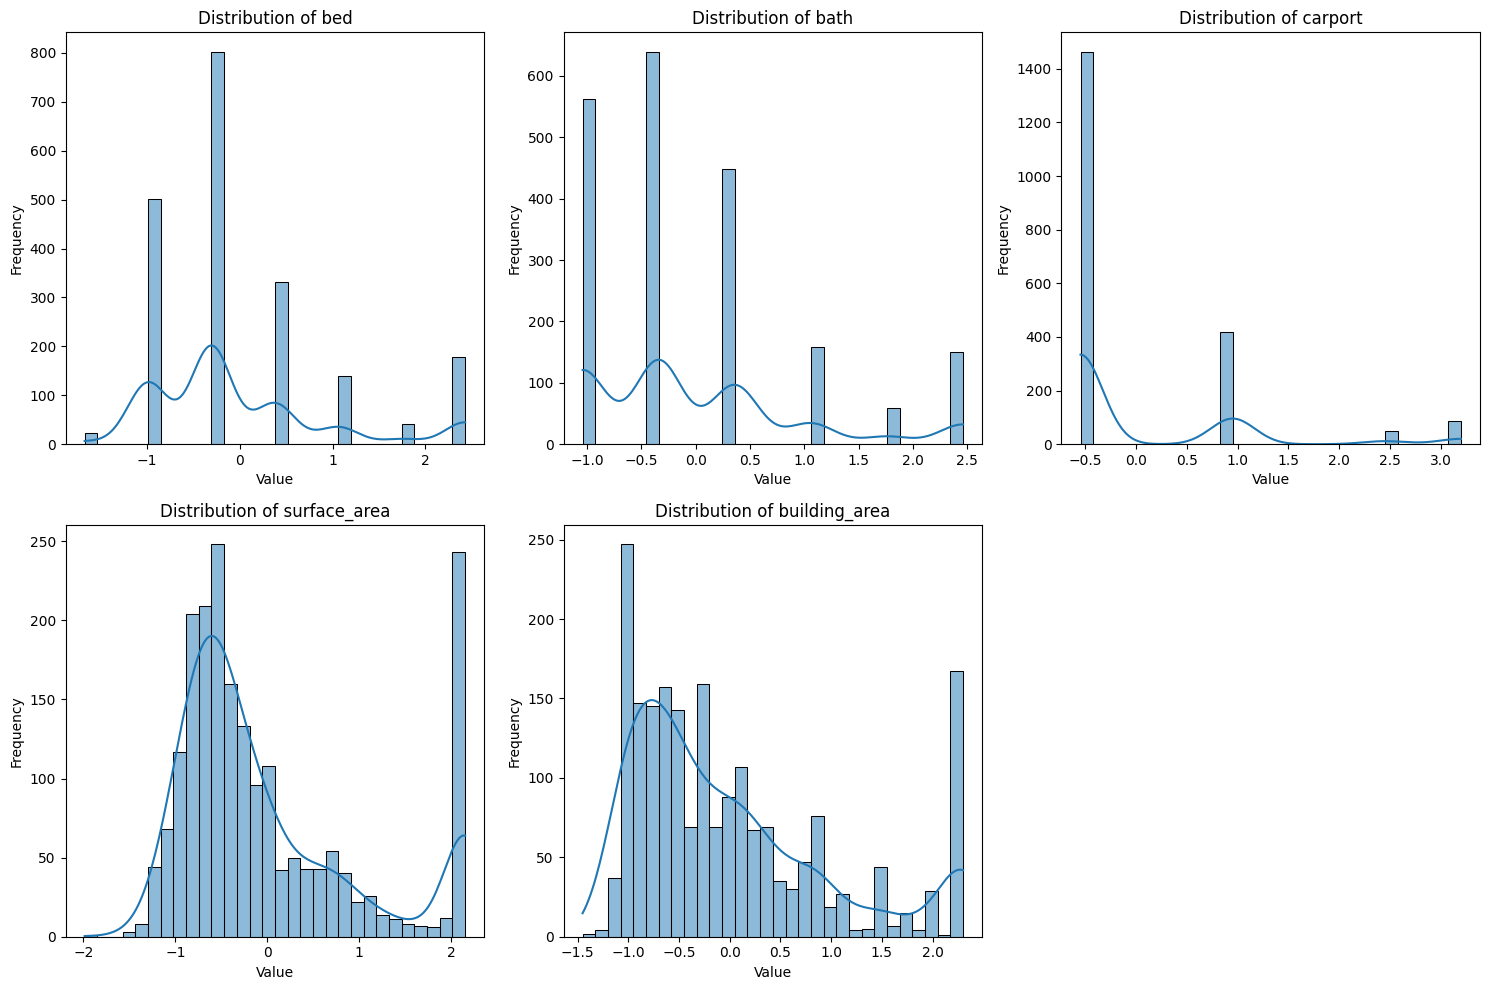

In [36]:
# Pilih beberapa kolom numerik untuk divisualisasikan
columns_to_plot = ['bed', 'bath', 'carport', 'surface_area', 'building_area']

# Tentukan ukuran figure
plt.figure(figsize=(15, 10))

# Loop untuk membuat subplot histogram
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 baris, 3 kolom grid layout
    sns.histplot(df_baru[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Agar layout rapi
plt.tight_layout()
plt.show()

In [37]:
# Korelasi antar fitur dengan harga rumah
correlation = df_baru.corr()['price'].sort_values(ascending=False)
print(correlation)

price               1.000000
building_area       0.828243
surface_area        0.805833
bath                0.712756
bed                 0.666921
listing-location    0.483248
carport             0.419080
Name: price, dtype: float64


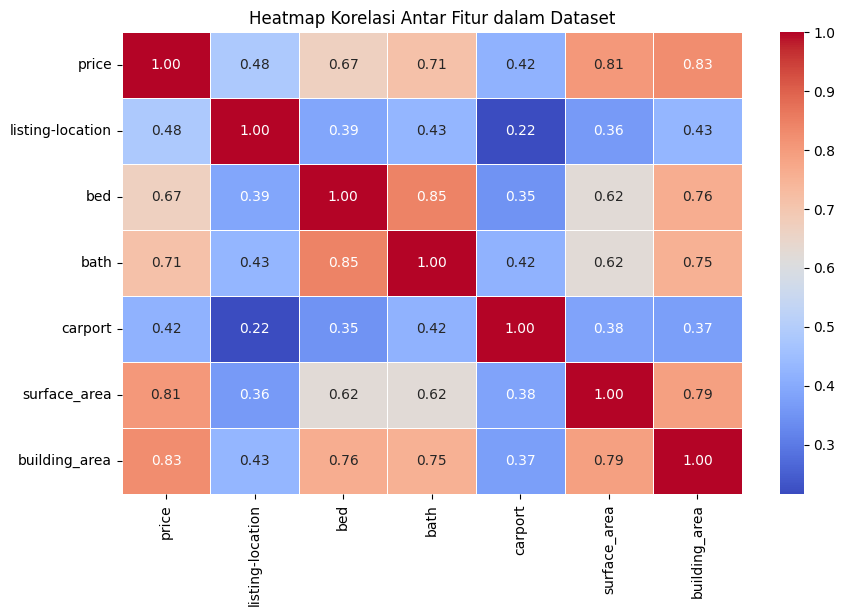

In [38]:
# Hitung matriks korelasi
correlation_matrix = df_baru.corr()

# Buat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Tambahkan judul
plt.title("Heatmap Korelasi Antar Fitur dalam Dataset")
plt.show()

# Modelling

In [39]:
import joblib
# Pisahkan fitur (X) dan target (y)
X = df_baru.drop(columns=['price'])  # Fitur
y = df_baru['price']  # Target

#  Split data menjadi 80% training - 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Scaling hanya pada fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform ke training data
X_test_scaled = scaler.transform(X_test)  # Transform data test

# Simpan scaler agar bisa digunakan saat prediksi nanti
joblib.dump(scaler, 'scaler.pkl')

# Inisialisasi model
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf')
}

# Melatih semua model dengan data yang sudah di-scaling
trained_models = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model  # Simpan model yang sudah dilatih

# Simpan model terbaik (misal, Random Forest)
joblib.dump(trained_models["Random Forest"], 'random_forest.pkl')

print("✅ Semua model telah selesai dilatih dan scaler telah disimpan.")

✅ Semua model telah selesai dilatih dan scaler telah disimpan.


# Model Evaluation

               Model           MAE           MSE  R² Score
0  Linear Regression  3.927517e+08  3.476507e+17  0.757724
1      Decision Tree  2.845085e+08  3.709254e+17  0.741504
2      Random Forest  2.356654e+08  2.268598e+17  0.841903
3  Gradient Boosting  3.131878e+08  2.736059e+17  0.809325
4                SVR  9.120308e+08  1.620229e+18 -0.129130


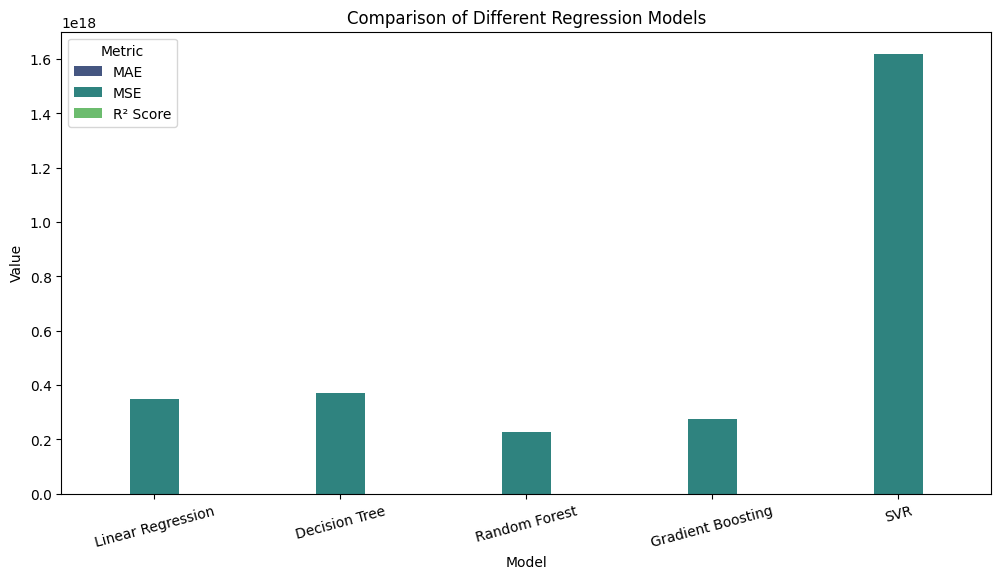

In [40]:
# Simpan hasil evaluasi model
results = []

# Evaluasi setiap model
for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)  # Gunakan X_test_scaled

    # Hitung metrik evaluasi
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Simpan hasilnya
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "R² Score": r2
    })

# Tampilkan hasil dalam DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Visualisasi hasil evaluasi
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars="Model", var_name="Metric", value_name="Value"),
            x="Model", y="Value", hue="Metric", palette="viridis")
plt.title("Comparison of Different Regression Models")
plt.xticks(rotation=15)
plt.show()

# Membandingkan data prediksi dan nilai sebenarnya


In [41]:
# Prediksi menggunakan model yang telah dilatih
y_pred = trained_models["Random Forest"].predict(X_test_scaled)

# Buat DataFrame untuk membandingkan hasil prediksi dan nilai sebenarnya
comparison_df = pd.DataFrame({
    'Actual Price': y_test.values,  # Nilai sebenarnya dari dataset
    'Predicted Price': y_pred       # Hasil prediksi model
})

# Tampilkan 20 baris pertama untuk perbandingan
print(comparison_df.head(20))


    Actual Price  Predicted Price
0   8.000000e+08     8.202300e+08
1   4.363750e+09     4.222900e+09
2   1.480000e+09     1.416850e+09
3   6.000000e+08     8.038833e+08
4   1.290000e+09     1.421887e+09
5   1.500000e+09     1.874417e+09
6   2.650000e+09     2.658804e+09
7   1.600000e+09     1.743850e+09
8   5.150000e+08     6.379700e+08
9   8.000000e+08     9.373500e+08
10  7.650000e+08     7.657875e+08
11  4.450000e+08     4.445833e+08
12  4.900000e+08     5.968700e+08
13  4.363750e+09     4.033773e+09
14  8.350000e+08     8.373730e+08
15  2.530000e+09     2.607100e+09
16  5.000000e+08     6.726298e+08
17  3.100000e+09     3.060546e+09
18  1.700000e+09     1.556463e+09
19  1.550000e+08     2.298805e+08


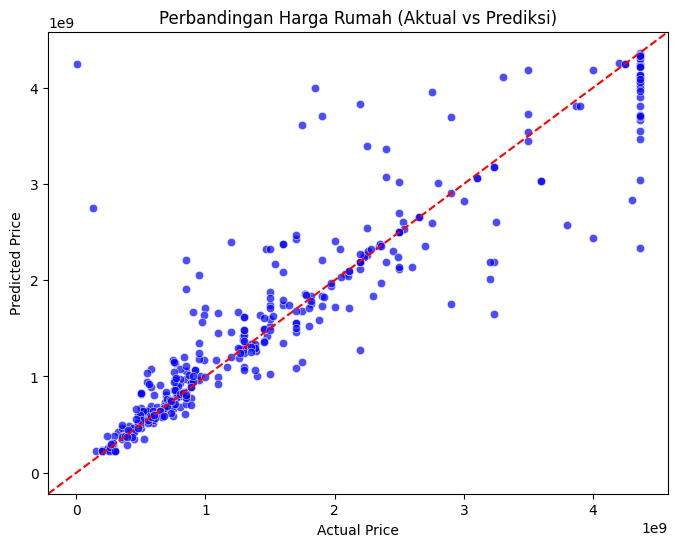

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Perbandingan Harga Rumah (Aktual vs Prediksi)")
plt.axline((0, 0), slope=1, color='red', linestyle="--")  # Garis diagonal ideal
plt.show()


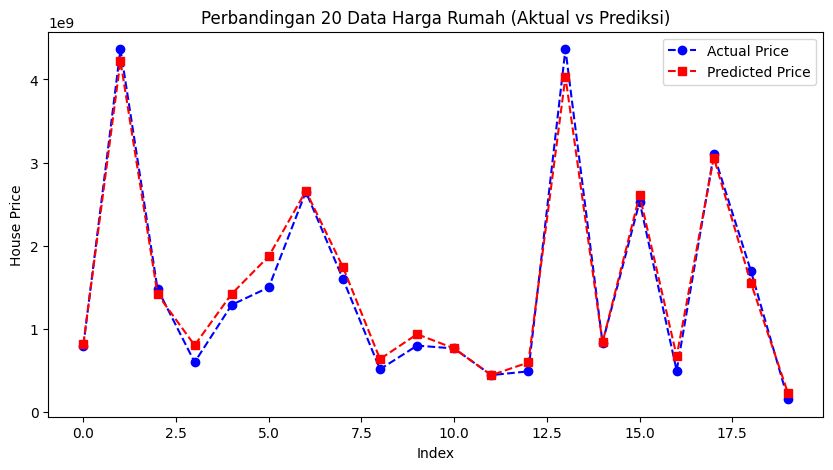

In [43]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:20], marker='o', label="Actual Price", linestyle="dashed", color="blue")
plt.plot(y_pred[:20], marker='s', label="Predicted Price", linestyle="dashed", color="red")

plt.xlabel("Index")
plt.ylabel("House Price")
plt.title("Perbandingan 20 Data Harga Rumah (Aktual vs Prediksi)")
plt.legend()
plt.show()


In [44]:
# Prediksi menggunakan model yang telah dilatih
y_pred = trained_models["Random Forest"].predict(X_test_scaled)

# Buat DataFrame untuk membandingkan hasil prediksi dan nilai sebenarnya
comparison_df = pd.DataFrame({
    'Actual Price': y_test.values,  # Nilai sebenarnya dari dataset
    'Predicted Price': y_pred       # Hasil prediksi model
})

# Tampilkan 20 baris pertama untuk perbandingan
print(comparison_df.head(20))


    Actual Price  Predicted Price
0   8.000000e+08     8.202300e+08
1   4.363750e+09     4.222900e+09
2   1.480000e+09     1.416850e+09
3   6.000000e+08     8.038833e+08
4   1.290000e+09     1.421887e+09
5   1.500000e+09     1.874417e+09
6   2.650000e+09     2.658804e+09
7   1.600000e+09     1.743850e+09
8   5.150000e+08     6.379700e+08
9   8.000000e+08     9.373500e+08
10  7.650000e+08     7.657875e+08
11  4.450000e+08     4.445833e+08
12  4.900000e+08     5.968700e+08
13  4.363750e+09     4.033773e+09
14  8.350000e+08     8.373730e+08
15  2.530000e+09     2.607100e+09
16  5.000000e+08     6.726298e+08
17  3.100000e+09     3.060546e+09
18  1.700000e+09     1.556463e+09
19  1.550000e+08     2.298805e+08
